In [ ]:
# 1) Import des packages nécessaires
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/fusion3.csv', sep =',', low_memory=False)
df.info()
df.dtypes
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291797 entries, 0 to 2291796
Data columns (total 44 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   num_acc             int64  
 2   place               float64
 3   catu                object 
 4   grav                object 
 5   sexe                object 
 6   trajet              object 
 7   locp                object 
 8   actp                object 
 9   etatp               object 
 10  an_nais             object 
 11  num_veh             object 
 12  secuUn              object 
 13  secuDeux            object 
 14  an_naiss            object 
 15  age_acc_an          float64
 16  tranches_ages       object 
 17  catr                object 
 18  circ                object 
 19  nbv                 float64
 20  vosp                object 
 21  prof                object 
 22  plan                object 
 23  surf                object 
 24  infra               obje

,Unnamed: 0,num_acc,place,catu,grav,sexe,trajet,locp,actp,etatp,...,lum,agg,int,atm,col,com,dep,date,jour_de_la_semaine,heure
0,0,200500000001,1.0,Conducteur,Blessé léger,Masculin,Domicile – travail,Sans objet,Non renseigné ou sans objet,Non renseigné,...,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi,19
1,1,200500000001,1.0,Conducteur,Blessé hospitalisé,Féminin,Courses – achats,Sans objet,Non renseigné ou sans objet,Non renseigné,...,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi,19
2,2,200500000001,2.0,Passager,Indemne,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,...,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi,19
3,3,200500000001,4.0,Passager,Indemne,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,...,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi,19
4,4,200500000001,5.0,Passager,Indemne,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,...,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi,19


In [ ]:
#3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291797 entries, 0 to 2291796
Data columns (total 44 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   num_acc             int64  
 2   place               float64
 3   catu                object 
 4   grav                object 
 5   sexe                object 
 6   trajet              object 
 7   locp                object 
 8   actp                object 
 9   etatp               object 
 10  an_nais             object 
 11  num_veh             object 
 12  secuUn              object 
 13  secuDeux            object 
 14  an_naiss            object 
 15  age_acc_an          float64
 16  tranches_ages       object 
 17  catr                object 
 18  circ                object 
 19  nbv                 float64
 20  vosp                object 
 21  prof                object 
 22  plan                object 
 23  surf                object 
 24  infra               obje

In [ ]:
# 4)
df.dtypes

Unnamed: 0              int64
num_acc                 int64
place                 float64
catu                   object
grav                   object
sexe                   object
trajet                 object
locp                   object
actp                   object
etatp                  object
an_nais                object
num_veh                object
secuUn                 object
secuDeux               object
an_naiss               object
age_acc_an            float64
tranches_ages          object
catr                   object
circ                   object
nbv                   float64
vosp                   object
prof                   object
plan                   object
surf                   object
infra                  object
situ                   object
senc                   object
occutc                float64
obs                    object
obsm                   object
choc                   object
manv                   object
catv_Label             object
permis    

In [ ]:
#5)
## Calcul des correlations et des variances

<ipython-input-6-abfcb2d5e23e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


<Axes: >

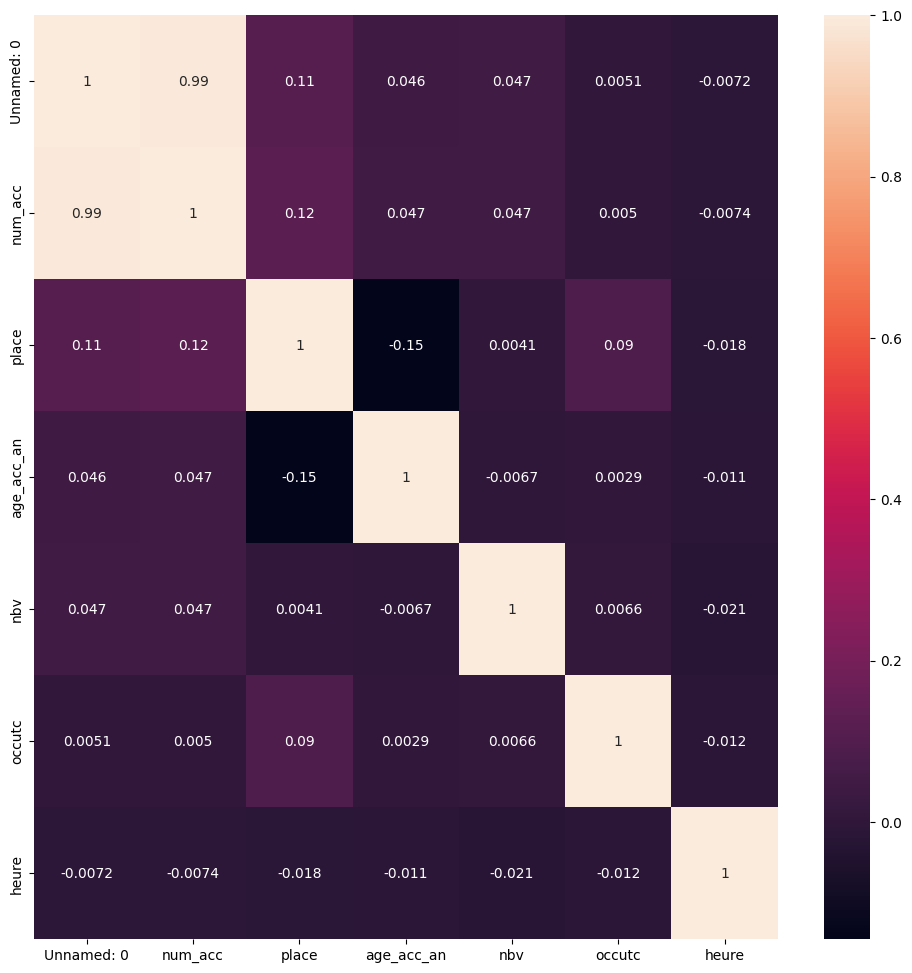

In [ ]:
cor = df.corr()
fig, ax = plt.subplots(figsize =(12,12))
sns.heatmap(cor, annot=True)

In [ ]:
## les valeurs des corrélations sont loin de 1 ou -1 : Pas exploitation à ce niveau

In [ ]:
#6) Calcul des variances
var = df.var()
var

<ipython-input-4-c6f8bc5bbc33>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  var = df.var()


Unnamed: 0    4.399843e+11
num_acc       2.068564e+17
place         1.318035e+00
age_acc_an    3.283555e+02
nbv           2.327863e+00
occutc        1.077457e+01
heure         2.856238e+01
dtype: float64

In [ ]:
## Calcul des variances des variables categorielles ##

In [ ]:
from collections import Counter
categ_columns = df.select_dtypes(include=['object']).columns
df_categ = df[categ_columns]
df_categ

,catu,grav,sexe,trajet,locp,actp,etatp,an_nais,num_veh,secuUn,...,permis,lum,agg,int,atm,col,com,dep,date,jour_de_la_semaine
0,Conducteur,Blessé léger,Masculin,Domicile – travail,Sans objet,Non renseigné ou sans objet,Non renseigné,1976-01-01,A01,Ceinture,...,Permis B,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi
1,Conducteur,Blessé hospitalisé,Féminin,Courses – achats,Sans objet,Non renseigné ou sans objet,Non renseigné,1968-01-01,B02,Ceinture,...,Permis B,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi
2,Passager,Indemne,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,1964-01-01,B02,Ceinture,...,Permis B,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi
3,Passager,Indemne,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,2004-01-01,B02,Dispositif enfants,...,Permis B,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi
4,Passager,Indemne,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,1998-01-01,B02,Ceinture,...,Permis B,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291792,Passager,Blessé léger,Masculin,Promenade – loisirs,Sans objet,Non renseigné ou sans objet,Non renseigné,2011-01-01,B01,Ceinture,...,Permis B,Plein jour,Hors agglomération,Hors intersection,Normale,Deux véhicules – par l’arrière,05061,05,2020-11-28,Samedi
2291793,Conducteur,Blessé léger,Féminin,Promenade – loisirs,Sans objet,Non renseigné ou sans objet,Non renseigné,1981-01-01,B01,Ceinture,...,Permis B,Plein jour,Hors agglomération,Hors intersection,Normale,Deux véhicules – par l’arrière,05061,05,2020-11-28,Samedi
2291794,Conducteur,Blessé léger,Masculin,Autre,Sans objet,Non renseigné ou sans objet,Non renseigné,1998-01-01,A01,Ceinture,...,Permis B,Plein jour,Hors agglomération,Hors intersection,Normale,Deux véhicules – par l’arrière,05061,05,2020-11-28,Samedi
2291795,Conducteur,Indemne,Masculin,Autre,Non renseigné,Non renseigné,Non renseigné,1967-01-01,A01,Casque,...,Permis A1 ou A2,Nuit avec éclairage public non allumé,En agglomération,Hors intersection,Normale,Autre collision,05061,05,2020-11-18,Mercredi


In [ ]:
from collections import Counter
categ_columns = df.select_dtypes(include=['object']).columns
df_categ = df[categ_columns]

categ_counts = Counter(df_categ)
total_samples = len(df_categ)

categ_probabilities = [count / total_samples for count in categ_counts.values()]
mean_probability = sum(categ_probabilities) / len(categ_probabilities)

variance_categ = sum((p - mean_probability)**2 for p in categ_probabilities) / len(categ_probabilities)

print("Variance des valeurs catégorielles :", variance_categ)


Variance des valeurs catégorielles : 2.5223372357846707e-44


In [ ]:
## Aucun résultat satisfaisont avec les calculs des variances

In [ ]:
#7) SELECTION DES VARIABLES FEATURES

In [ ]:
# Cration de nouvelle datset pour appliquer les modification des features selectionnées

In [ ]:
accid = df.copy(all)

In [ ]:
XY= df.copy(all)

In [ ]:
XY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291797 entries, 0 to 2291796
Data columns (total 44 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   num_acc             int64  
 2   place               float64
 3   catu                object 
 4   grav                object 
 5   sexe                object 
 6   trajet              object 
 7   locp                object 
 8   actp                object 
 9   etatp               object 
 10  an_nais             object 
 11  num_veh             object 
 12  secuUn              object 
 13  secuDeux            object 
 14  an_naiss            object 
 15  age_acc_an          float64
 16  tranches_ages       object 
 17  catr                object 
 18  circ                object 
 19  nbv                 float64
 20  vosp                object 
 21  prof                object 
 22  plan                object 
 23  surf                object 
 24  infra               obje

In [ ]:
y = XY['grav']
y

KeyError: ignored

In [ ]:
y

0                Blessé léger
1          Blessé hospitalisé
2                     Indemne
3                     Indemne
4                     Indemne
                  ...        
2291792          Blessé léger
2291793          Blessé léger
2291794          Blessé léger
2291795               Indemne
2291796          Blessé léger
Name: grav, Length: 2291797, dtype: object

In [ ]:
X = XY.drop('grav', axis=1, inplace=True)

In [ ]:
X

In [ ]:
XY

,Unnamed: 0,num_acc,place,catu,sexe,trajet,locp,actp,etatp,an_nais,...,lum,agg,int,atm,col,com,dep,date,jour_de_la_semaine,heure
0,0,200500000001,1.0,Conducteur,Masculin,Domicile – travail,Sans objet,Non renseigné ou sans objet,Non renseigné,1976-01-01,...,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi,19
1,1,200500000001,1.0,Conducteur,Féminin,Courses – achats,Sans objet,Non renseigné ou sans objet,Non renseigné,1968-01-01,...,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi,19
2,2,200500000001,2.0,Passager,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,1964-01-01,...,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi,19
3,3,200500000001,4.0,Passager,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,2004-01-01,...,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi,19
4,4,200500000001,5.0,Passager,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,1998-01-01,...,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291792,2297701,202000047743,4.0,Passager,Masculin,Promenade – loisirs,Sans objet,Non renseigné ou sans objet,Non renseigné,2011-01-01,...,Plein jour,Hors agglomération,Hors intersection,Normale,Deux véhicules – par l’arrière,05061,05,2020-11-28,Samedi,11
2291793,2297702,202000047743,1.0,Conducteur,Féminin,Promenade – loisirs,Sans objet,Non renseigné ou sans objet,Non renseigné,1981-01-01,...,Plein jour,Hors agglomération,Hors intersection,Normale,Deux véhicules – par l’arrière,05061,05,2020-11-28,Samedi,11
2291794,2297703,202000047743,1.0,Conducteur,Masculin,Autre,Sans objet,Non renseigné ou sans objet,Non renseigné,1998-01-01,...,Plein jour,Hors agglomération,Hors intersection,Normale,Deux véhicules – par l’arrière,05061,05,2020-11-28,Samedi,11
2291795,2297704,202000047744,1.0,Conducteur,Masculin,Autre,Non renseigné,Non renseigné,Non renseigné,1967-01-01,...,Nuit avec éclairage public non allumé,En agglomération,Hors intersection,Normale,Autre collision,05061,05,2020-11-18,Mercredi,17


In [ ]:
# variables explicatives catégorielles
Xc = X.drop(['Unnamed: 0', 'num_acc','place', 'an_nais', 'an_naiss', 'age_acc_an', 'place', 'nbv', 'occutc'], axis=1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
X_train_he_sex = pd.get_dummies(X_train['sexe'])

In [ ]:
X_train_he_catu = pd.get_dummies(X_train['catu'])

In [ ]:
#8) Encoder des variables catégorielles (et memes les numériques)
# Encodage get_dummies des variables catégorielles
for col in X.select_dtypes("category"):
    X = pd.get_dummies(X, columns=[col])

# Affichez la base de données encodées
print(X.head())

         catu                grav      sexe              trajet        locp  \
0  Conducteur        Blessé léger  Masculin  Domicile – travail  Sans objet   
1  Conducteur  Blessé hospitalisé   Féminin    Courses – achats  Sans objet   
2    Passager             Indemne  Masculin       Non renseigné  Sans objet   
3    Passager             Indemne  Masculin       Non renseigné  Sans objet   
4    Passager             Indemne  Masculin       Non renseigné  Sans objet   

                          actp          etatp num_veh              secuUn  \
0  Non renseigné ou sans objet  Non renseigné     A01            Ceinture   
1  Non renseigné ou sans objet  Non renseigné     B02            Ceinture   
2  Non renseigné ou sans objet  Non renseigné     B02            Ceinture   
3  Non renseigné ou sans objet  Non renseigné     B02  Dispositif enfants   
4  Non renseigné ou sans objet  Non renseigné     B02            Ceinture   

   secuDeux  ...                         lum               agg

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Créez un objet OneHotEncoder()
encoder = OneHotEncoder()
# Encodage one-hot des variables catégorielles
for col in X.select_dtypes("category"):
    X[col] = encoder.fit_transform(X[col].values.reshape(-1, 1))

# Affichez la base de données encodées
print(X.head())


         catu      sexe              trajet        locp  \
0  Conducteur  Masculin  Domicile – travail  Sans objet   
1  Conducteur   Féminin    Courses – achats  Sans objet   
2    Passager  Masculin       Non renseigné  Sans objet   
3    Passager  Masculin       Non renseigné  Sans objet   
4    Passager  Masculin       Non renseigné  Sans objet   

                          actp          etatp num_veh              secuUn  \
0  Non renseigné ou sans objet  Non renseigné     A01            Ceinture   
1  Non renseigné ou sans objet  Non renseigné     B02            Ceinture   
2  Non renseigné ou sans objet  Non renseigné     B02            Ceinture   
3  Non renseigné ou sans objet  Non renseigné     B02  Dispositif enfants   
4  Non renseigné ou sans objet  Non renseigné     B02            Ceinture   

   secuDeux tranches_ages  ...    permis                         lum  \
0  Ceinture         23-31  ...  Permis B  Nuit sans éclairage public   
1  Ceinture         32-40  ...  Permis

In [ ]:
# Créez un objet OneHotEncoder()
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

# Encodage one-hot des variables catégorielles
for col in X.select_dtypes("category"):
    X[col] = encoder.fit_transform(df[col].values.reshape(-1, 1))

# Enregistrez le jeu de données encodé
X.to_csv("X_encoded.csv")

,catu,sexe,trajet,locp,actp,etatp,num_veh,secuUn,secuDeux,tranches_ages,...,permis,lum,agg,int,atm,col,com,dep,date,jour_de_la_semaine
0,Conducteur,Masculin,Domicile – travail,Sans objet,Non renseigné ou sans objet,Non renseigné,A01,Ceinture,Ceinture,23-31,...,Permis B,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi
1,Conducteur,Féminin,Courses – achats,Sans objet,Non renseigné ou sans objet,Non renseigné,B02,Ceinture,Ceinture,32-40,...,Permis B,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi
2,Passager,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,B02,Ceinture,Ceinture,41-50,...,Permis B,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi
3,Passager,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,B02,Dispositif enfants,Ceinture,0-11,...,Permis B,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi
4,Passager,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,B02,Ceinture,Ceinture,0-11,...,Permis B,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291792,Passager,Masculin,Promenade – loisirs,Sans objet,Non renseigné ou sans objet,Non renseigné,B01,Ceinture,Aucun équipement,0-11,...,Permis B,Plein jour,Hors agglomération,Hors intersection,Normale,Deux véhicules – par l’arrière,05061,05,2020-11-28,Samedi
2291793,Conducteur,Féminin,Promenade – loisirs,Sans objet,Non renseigné ou sans objet,Non renseigné,B01,Ceinture,Aucun équipement,32-40,...,Permis B,Plein jour,Hors agglomération,Hors intersection,Normale,Deux véhicules – par l’arrière,05061,05,2020-11-28,Samedi
2291794,Conducteur,Masculin,Autre,Sans objet,Non renseigné ou sans objet,Non renseigné,A01,Ceinture,Aucun équipement,12-22,...,Permis B,Plein jour,Hors agglomération,Hors intersection,Normale,Deux véhicules – par l’arrière,05061,05,2020-11-28,Samedi
2291795,Conducteur,Masculin,Autre,Non renseigné,Non renseigné,Non renseigné,A01,Casque,Aucun équipement,50+,...,Permis A1 ou A2,Nuit avec éclairage public non allumé,En agglomération,Hors intersection,Normale,Autre collision,05061,05,2020-11-18,Mercredi


In [ ]:
X_train_he_heure = pd.get_dummies(X_train['heure'])

In [ ]:
X_train_he_heure

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
174127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
947996,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1942137,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1481637,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
540672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398625,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2088434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X_train_he_catu

,Conducteur,Passager,Piéton
174127,1,0,0
947996,1,0,0
1942137,1,0,0
1481637,1,0,0
540672,1,0,0
...,...,...,...
398625,1,0,0
109240,1,0,0
96728,1,0,0
2088434,1,0,0


In [ ]:
X_train_he_sex

,Féminin,Masculin
174127,1,0
947996,0,1
1942137,0,1
1481637,0,1
540672,0,1
...,...,...
398625,0,1
109240,0,1
96728,0,1
2088434,1,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model = LogisticRegression()
cross_val = KFold(n_splits=5, random_state=42)
scores = cross_val_score(model, x_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Logistic Regression: ", scores.mean())
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trains = scaler(X_train)

ValueError: ignored

In [ ]:
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

NameError: ignored

In [ ]:
# 11) Initialise le modèle RandomForest et contruit:

model_rf = RandomForestClassifier(n_estimators=100, max_depth=8)

In [ ]:
# 12) Entrainement du modèle RandomForest :

model_rf.fit(X_train, y)

ValueError: ignored

In [ ]:
X_tran = pd.get_dummies(X_train)

NameError: ignored

NameError: ignored

In [ ]:
## Selection des features
## Pour les variables non catégorielles à reorganiser :
# heure ( categoriser les horaires - serie pandas chaque horaire est associée à la catégorie qui lui correspond)
heure_label=pd.cut(accid['heure'],24,labels=[str(i) for i in range(0,24)])
# Remplace la colonne des horaires des accidents par la colonne des catégories d’horaires
accid['heure']=heure_label.values
print(accid['heure'])

## Variables numériques rejetées : num_acc, place (plan tracé), age_acc_an (age au moment de l'accident),
## nbv (nombre total de voirie de circulation), occutc(Nombre d'Occupants dans le transport commun)



0          19
1          19
2          19
3          19
4          19
           ..
2291792    11
2291793    11
2291794    11
2291795    17
2291796    17
Name: heure, Length: 2291797, dtype: category
Categories (24, object): ['0' < '1' < '2' < '3' ... '20' < '21' < '22' < '23']


In [ ]:
# Categorize the 'heure' column into 24 bins and assign labels
heure_label = pd.cut(accid['heure'], bins=24, labels=[str(i) for i in range(24)])
# Update the 'heure' column with the labels

heure_label


TypeError: ignored

In [ ]:
accid['heure'] = heure_label.values
accid['heure']


0          19
1          19
2          19
3          19
4          19
           ..
2291792    11
2291793    11
2291794    11
2291795    17
2291796    17
Name: heure, Length: 2291797, dtype: category
Categories (24, object): ['0' < '1' < '2' < '3' ... '20' < '21' < '22' < '23']

In [ ]:
## Selection des features catégorielles
features_num = ['num_acc','place','age_acc_an','nbv','occutc','heure']
features_cat = ['heure','catu','sexe','trajet','locp',
           'actp','etatp','an_nais','num_veh','secuUn','secuDeux','an_naiss','tranches_ages','catr','circ',
           'vosp','prof','plan','surf','infra','situ','senc','obs','obsm','choc','manv','catv_Label',
            'permis','lum','agg','int','atm', 'col','com','dep','date','jour_de_la_semaine']
features= ['num_acc','place','age_acc_an','nbv','occutc','heure','catu','sexe','trajet','locp',
           'actp','etatp','an_nais','num_veh','secuUn','secuDeux','an_naiss','tranches_ages','catr','circ',
           'vosp','prof','plan','surf','infra','situ','senc','obs','obsm','choc','manv','catv_Label',
            'permis','lum','agg','int','atm', 'col','com','dep','date','jour_de_la_semaine']
features_short= ['num_acc','place','heure','date','jour_de_la_semaine']


In [ ]:
#7
y = accid['grav']
y

0                Blessé léger
1          Blessé hospitalisé
2                     Indemne
3                     Indemne
4                     Indemne
                  ...        
2291792          Blessé léger
2291793          Blessé léger
2291794          Blessé léger
2291795               Indemne
2291796          Blessé léger
Name: grav, Length: 2291797, dtype: object

In [ ]:
for col in accid.columns:
  print(col)

catu
grav
sexe
trajet
locp
actp
etatp
secuUn
secuDeux
an_naiss
tranches_ages
catr
circ
vosp
prof
plan
surf
infra
situ
senc
obs
obsm
choc
manv
catv_Label
permis
lum
agg
int
atm
col
com
dep
date
jour_de_la_semaine


In [ ]:
X = accid
X.head()

,num_acc,place,catu,sexe,trajet,locp,actp,etatp,an_nais,num_veh,...,lum,agg,int,atm,col,com,dep,date,jour_de_la_semaine,heure
0,200500000001,1.0,Conducteur,Masculin,Domicile – travail,Sans objet,Non renseigné ou sans objet,Non renseigné,1976-01-01,A01,...,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi,19
1,200500000001,1.0,Conducteur,Féminin,Courses – achats,Sans objet,Non renseigné ou sans objet,Non renseigné,1968-01-01,B02,...,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi,19
2,200500000001,2.0,Passager,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,1964-01-01,B02,...,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi,19
3,200500000001,4.0,Passager,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,2004-01-01,B02,...,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi,19
4,200500000001,5.0,Passager,Masculin,Non renseigné,Sans objet,Non renseigné ou sans objet,Non renseigné,1998-01-01,B02,...,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,59,2005-01-12,Mercredi,19


In [ ]:
#8) Encoder des variables catégorielles (et memes les numériques)
X = pd.get_dummies(X.astype(str))

In [ ]:
#8) Encoder des variables catégorielles (et memes les numériques)
X_train_accid = pd.get_dummies(accid[features].astype(str))

In [ ]:
X_train_accid_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3708 entries, 0 to 3707
Columns: 1089 entries, heure_0 to jour_de_la_semaine_nan
dtypes: uint8(1089)
memory usage: 3.9 MB


In [ ]:
#9) On commence par normaliser les données avec X_trained_cat :

X_train_accid_cat = normalize(X_train_accid_cat.values)

In [ ]:
#   (A REVOIR SANS EXECUTER) 9) On commence par normaliser les données

X_train_accid = normalize(X_train_accid.values)

In [ ]:
# 10) On divise la base en bases d'entraînements et de test :

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_train_accid_cat,y)

In [ ]:
# 11) Initialise le modèle RandomForest et contruit:

model_rf = RandomForestClassifier(n_estimators=100, max_depth=8)

In [ ]:
# 12) Entrainement du modèle RandomForest :

model_rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_depth=8)

In [ ]:
#13) Prédictions de la gravité des accidents sur les données d'entrainement

predict_train = model_rf.predict(X_train_rf)

In [ ]:
# 14) Prédictions de la gravité des accidents sur les données de test

predict_test = model_rf.predict(X_test_rf)

In [ ]:
# 15) Calcul et Affichage des scores des prédictions :

train_acc_rf = accuracy_score(y_train_rf, predict_train)
print('Score Prédiction des entrainements :',train_acc_rf)

test_acc_rf = accuracy_score(y_test_rf, predict_test)
print('Score Prédiction du test :',test_acc_rf)

Score Prédiction des entrainements : 0.5728155339805825
Score Prédiction du test : 0.5124056094929881


In [ ]:
#16) Construction du modèle XGBOOST
# Redécoupage du jeu de données fusion3.csv

X_train, X_test, y_train, y_test = train_test_split(X_train_accid_cat,y)

In [ ]:
# 17) Création du modèle Gradient Boosting Classificateur :
model_boosting = GradientBoostingClassifier(loss="deviance",
    learning_rate=0.2,
    max_depth=5,
    max_features="sqrt",
    subsample=0.95,
    n_estimators=200)

In [ ]:
#18) Entraînement du modèle sur le jeu d'entrainement :

model_boosting.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


GradientBoostingClassifier(learning_rate=0.2, loss='deviance', max_depth=5,
                           max_features='sqrt', n_estimators=200,
                           subsample=0.95)

In [ ]:
# 19)   Prédictions avec le modèle XGBOOST
predict_test_xgb = model_boosting.predict(X_test)
predict_train_xgb = model_boosting.predict(X_train)

# Affichage des résultats :

train_acc_xgb = accuracy_score(y_train, predict_train_xgb)
print('Score Prédiction XGBOOST des entrainements :',train_acc_xgb)

test_acc_xgb = accuracy_score(y_test, predict_test_xgb)
print('Score Prédiction XGBOOST du Test :',test_acc_xgb)

Score Prédiction XGBOOST des entrainements : 0.9435454872348076
Score Prédiction XGBOOST du Test : 0.5188781014023732


In [ ]:
# 19)   Les resultats avec RandomForest et XGBOOST :
print('Score Prédiction RandomForest du test  :',test_acc_rf)
print('Score Prédiction XGBOOST du Test :',test_acc_xgb)

Score Prédiction RandomForest du test  : 0.5124056094929881
Score Prédiction XGBOOST du Test : 0.5188781014023732
